# Data Mining Project


## Importing packages and initializing dataframes

In [396]:
import numpy as np
import altair as alt
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [397]:
sns.set_theme(style="whitegrid")

In [398]:
df = pd.read_csv("LaundryData.csv")

In [399]:
df.head()

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


## Exploratory Data Analysis and Data Preprocessing

### What are the data types for each column?

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             807 non-null    int64  
 1   Date           807 non-null    object 
 2   Time           807 non-null    object 
 3   Race           797 non-null    object 
 4   Gender         793 non-null    object 
 5   Body_Size      790 non-null    object 
 6   Age_Range      799 non-null    float64
 7   With_Kids      794 non-null    object 
 8   Kids_Category  777 non-null    object 
 9   Basket_Size    801 non-null    object 
 10  Basket_colour  798 non-null    object 
 11  Attire         776 non-null    object 
 12  Shirt_Colour   798 non-null    object 
 13  shirt_type     770 non-null    object 
 14  Pants_Colour   802 non-null    object 
 15  pants_type     798 non-null    object 
 16  Wash_Item      784 non-null    object 
 17  Washer_No      807 non-null    int64  
 18  Dryer_No  

### Are there any null values in each column?

In [401]:
df.isnull().sum()

No                0
Date              0
Time              0
Race             10
Gender           14
Body_Size        17
Age_Range         8
With_Kids        13
Kids_Category    30
Basket_Size       6
Basket_colour     9
Attire           31
Shirt_Colour      9
shirt_type       37
Pants_Colour      5
pants_type        9
Wash_Item        23
Washer_No         0
Dryer_No          0
Spectacles        0
dtype: int64

In [402]:
tempdf = df
null_columns=tempdf.columns[tempdf.isnull().any()]
display(tempdf[null_columns].isnull().sum())

display(len(tempdf.groupby('No')))
display(tempdf[tempdf.isnull().any(axis=1)][null_columns].info())
display(tempdf[tempdf.isnull().any(axis=1)][null_columns].head())

Race             10
Gender           14
Body_Size        17
Age_Range         8
With_Kids        13
Kids_Category    30
Basket_Size       6
Basket_colour     9
Attire           31
Shirt_Colour      9
shirt_type       37
Pants_Colour      5
pants_type        9
Wash_Item        23
dtype: int64

807

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 3 to 801
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Race           155 non-null    object 
 1   Gender         151 non-null    object 
 2   Body_Size      148 non-null    object 
 3   Age_Range      157 non-null    float64
 4   With_Kids      152 non-null    object 
 5   Kids_Category  135 non-null    object 
 6   Basket_Size    159 non-null    object 
 7   Basket_colour  156 non-null    object 
 8   Attire         134 non-null    object 
 9   Shirt_Colour   156 non-null    object 
 10  shirt_type     128 non-null    object 
 11  Pants_Colour   160 non-null    object 
 12  pants_type     156 non-null    object 
 13  Wash_Item      142 non-null    object 
dtypes: float64(1), object(13)
memory usage: 19.3+ KB


None

,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item
3,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes
5,NaN,male,fat,50.0,no,no_kids,small,white,casual,brown,NaN,blue_jeans,long,clothes
6,NaN,female,fat,45.0,no,no_kids,big,pink,traditional,blue,NaN,black,long,clothes
7,indian,male,thin,49.0,no,NaN,big,blue,casual,white,short_sleeve,brown,long,clothes
9,chinese,male,moderate,33.0,no,no_kids,small,pink,casual,white,short_sleeve,blue_jeans,short,NaN



#### Removing null values.

In [403]:
df = df.dropna()

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             642 non-null    int64  
 1   Date           642 non-null    object 
 2   Time           642 non-null    object 
 3   Race           642 non-null    object 
 4   Gender         642 non-null    object 
 5   Body_Size      642 non-null    object 
 6   Age_Range      642 non-null    float64
 7   With_Kids      642 non-null    object 
 8   Kids_Category  642 non-null    object 
 9   Basket_Size    642 non-null    object 
 10  Basket_colour  642 non-null    object 
 11  Attire         642 non-null    object 
 12  Shirt_Colour   642 non-null    object 
 13  shirt_type     642 non-null    object 
 14  Pants_Colour   642 non-null    object 
 15  pants_type     642 non-null    object 
 16  Wash_Item      642 non-null    object 
 17  Washer_No      642 non-null    int64  
 18  Dryer_No  

In [405]:
df.isnull().sum()

No               0
Date             0
Time             0
Race             0
Gender           0
Body_Size        0
Age_Range        0
With_Kids        0
Kids_Category    0
Basket_Size      0
Basket_colour    0
Attire           0
Shirt_Colour     0
shirt_type       0
Pants_Colour     0
pants_type       0
Wash_Item        0
Washer_No        0
Dryer_No         0
Spectacles       0
dtype: int64

Which age groups frequent the laundry the most?

<AxesSubplot:xlabel='Age_Range', ylabel='Count'>

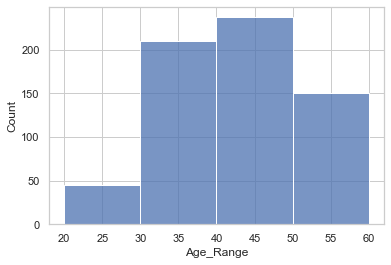

In [406]:
analysis = df.copy()

bins = [20,30,40,50,60]

sns.histplot(data=analysis, x="Age_Range", bins = bins)

Which race frequently goes for the laundry the most?

<AxesSubplot:ylabel='Race'>

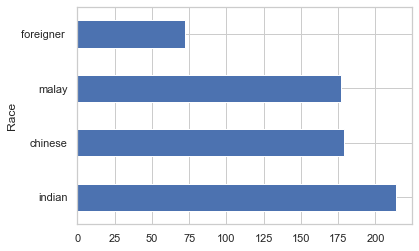

In [407]:
df["Race"].value_counts().plot(kind="barh",xlabel = "Race")

are there any particularly popular washer-dryer combinations?

In [408]:
df1=df.groupby(['Washer_No','Dryer_No']).size().reset_index().rename(columns={0:'count'})
df1['Washer_Dryer_combo'] = '['+df1['Washer_No'].astype(str) + ', ' + df1['Dryer_No'].astype(str)+']'

df1 = df1.sort_values('count', ascending = False).reset_index(drop=True)
display(df1.head())

,Washer_No,Dryer_No,count,Washer_Dryer_combo
0,3,7,72,"[3, 7]"
1,6,10,57,"[6, 10]"
2,4,8,46,"[4, 8]"
3,5,9,45,"[5, 9]"
4,5,7,44,"[5, 7]"


<AxesSubplot:xlabel='Washer_Dryer_combo', ylabel='count'>

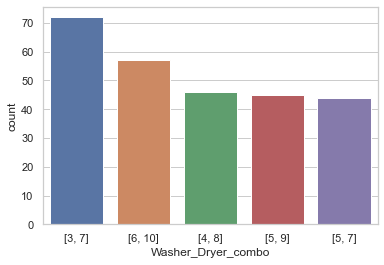

In [409]:
sns.barplot(x = 'Washer_Dryer_combo', y = 'count', data = df1.head())

what kind of customers are using washer 3 and dryer 7?

In [410]:
popwash = df['Washer_No']==3
popdry = df['Dryer_No']==7
df2col = ['Race','Gender','Body_Size','Age_Range','Wash_Item','Basket_Size']
df2 = df[popwash]
df2 = df2[popdry].drop('No',1).reset_index(drop=True)
df2 = df2[df2col]
df2 = df2.groupby(['Race','Gender']).size().reset_index().rename(columns={0:'count'})
display(df2)

<ipython-input-410-7152a04d1a73>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[popdry].drop('No',1).reset_index(drop=True)


,Race,Gender,count
0,chinese,female,7
1,chinese,male,7
2,foreigner,female,3
3,foreigner,male,6
4,indian,female,12
5,indian,male,11
6,malay,female,15
7,malay,male,11


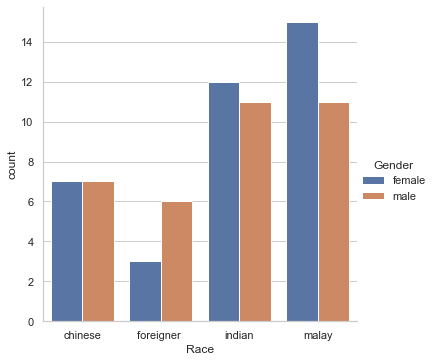

In [411]:
sns.catplot(x = 'Race', y = 'count', hue = 'Gender', data = df2, kind='bar', ci = None)

is there a relation between race and basket size?

In [412]:
df3=df.groupby(['Basket_Size','Race']).size().reset_index().rename(columns={0:'Basket_count'}).sort_values('Basket_count', ascending=False)
display(df3.head())

,Basket_Size,Race,Basket_count
2,big,indian,196
0,big,chinese,173
3,big,malay,163
1,big,foreigner,66
6,small,indian,18


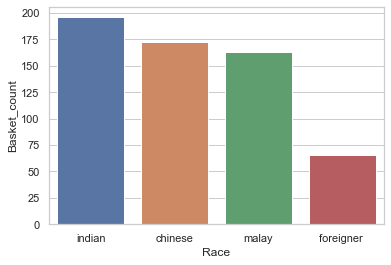

In [413]:
df3bar = sns.barplot(x = 'Race', y = 'Basket_count', data=df3[df3['Basket_Size']=='big'], ci=None)

In [414]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [415]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [416]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [417]:
df_GD = df.copy()
df_GD = df_GD.drop(["No", "Date", "Time"],1)
objList = df_GD.select_dtypes(include = "object").columns
leList = ['Gender','With_Kids','Basket_Size','shirt_type','pants_type','Spectacles','Body_Size', "Kids_Category","Basket_colour","Shirt_Colour","Pants_Colour"]
ohList = []
for x in objList:
  if x not in leList:
    ohList.append(x)

for x in leList:
    df_GD[x] = LabelEncoder().fit_transform(df_GD[x].astype(str))

for x in ohList:
    obj_list = 'x'+'_'+x
    obj_list = pd.get_dummies(df_GD[x],prefix=x)
    df_GD1=df_GD.join(obj_list)
    df_GD=df_GD1
    
df_obj=df_GD.columns.values.tolist()
to_keep=[i for i in df_obj if i not in ohList]
df_GD = df_GD[to_keep]
display(df_GD)

,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Shirt_Colour,shirt_type,Pants_Colour,...,Spectacles,Race_chinese,Race_foreigner,Race_indian,Race_malay,Attire_casual,Attire_formal,Attire_traditional,Wash_Item_blankets,Wash_Item_clothes
0,1,1,28.0,1,4,0,8,2,1,0,...,0,0,0,0,1,1,0,0,0,1
1,1,2,32.0,0,1,0,3,10,1,4,...,0,0,0,1,0,1,0,0,0,1
2,0,1,30.0,0,1,0,1,9,1,0,...,0,0,0,0,1,1,0,0,0,1
4,1,1,34.0,0,1,0,1,2,1,12,...,0,0,0,1,0,1,0,0,0,1
8,1,2,30.0,0,1,1,7,10,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,1,45.0,0,1,1,9,9,0,0,...,0,0,0,0,1,1,0,0,0,1
803,1,0,34.0,0,1,0,4,10,1,0,...,0,0,0,0,1,1,0,0,1,0
804,0,1,53.0,0,1,0,7,7,0,9,...,1,0,0,0,1,0,0,1,0,1
805,0,1,37.0,0,1,0,3,3,1,0,...,0,0,0,1,0,0,0,1,0,1


In [418]:
df_GD.to_csv("dfEncoded.csv")

In [419]:
y = df_GD.loc[:, df_GD.columns == 'Wash_Item_clothes']
X = df_GD.drop(["Wash_Item_blankets","Wash_Item_clothes"], 1)
colnames = X.columns
X.head()

,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Shirt_Colour,shirt_type,Pants_Colour,...,Washer_No,Dryer_No,Spectacles,Race_chinese,Race_foreigner,Race_indian,Race_malay,Attire_casual,Attire_formal,Attire_traditional
0,1,1,28.0,1,4,0,8,2,1,0,...,3,10,0,0,0,0,1,1,0,0
1,1,2,32.0,0,1,0,3,10,1,4,...,6,9,0,0,0,1,0,1,0,0
2,0,1,30.0,0,1,0,1,9,1,0,...,4,10,0,0,0,0,1,1,0,0
4,1,1,34.0,0,1,0,1,2,1,12,...,3,9,0,0,0,1,0,1,0,0
8,1,2,30.0,0,1,1,7,10,1,0,...,6,10,0,0,0,1,0,1,0,0


In [420]:
y

,Wash_Item_clothes
0,1
1,1
2,1
4,1
8,1
...,...
802,1
803,0
804,1
805,1


####oversampling

In [421]:
from imblearn.over_sampling import SMOTE

In [422]:
print('number of bankets in ovesampled data ',len(y[y['Wash_Item_clothes']==0]))
print('number of clothes ',len(y[y['Wash_Item_clothes']==1]))
print('proportion of blankets in oversampled data is ',len(y[y['Wash_Item_clothes']==0])/len(X))
print('proportion of clothes data in oversampled data is ',len(y[y['Wash_Item_clothes']==1])/len(X))

number of bankets in ovesampled data  127
number of clothes  515
proportion of blankets in oversampled data is  0.19781931464174454
proportion of clothes data in oversampled data is  0.8021806853582555


In [423]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(), test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y,columns=['Wash_Item_clothes'])


print('length of oversampled data is ',len(os_data_X))
print('number of bankets in ovesampled data ',len(os_data_y[os_data_y['Wash_Item_clothes']==0]))
print('number of clothes ',len(os_data_y[os_data_y['Wash_Item_clothes']==1]))
print('proportion of blankets in oversampled data is ',len(os_data_y[os_data_y['Wash_Item_clothes']==0])/len(os_data_X))
print('proportion of clothes data in oversampled data is ',len(os_data_y[os_data_y['Wash_Item_clothes']==1])/len(os_data_X))

length of oversampled data is  724
number of bankets in ovesampled data  362
number of clothes  362
proportion of blankets in oversampled data is  0.5
proportion of clothes data in oversampled data is  0.5


In [424]:
os_data_X.to_csv("os_data_X.csv")
os_data_y.to_csv("os_data_y.csv")

####Feature Selection

In [425]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth = 5)

feat_selector = BorutaPy(rf, n_estimators='auto', random_state=1)
feat_selector.fit(os_data_X.values, os_data_y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=101, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x292C59FC940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x292C59FC940)

In [426]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values('Score', ascending = False).reset_index(drop=True)
print('---------Top 5----------')
# your codes here...
display(boruta_score.head(5))

print('---------Bottom 5----------')
# your codes here...
boruta_score.tail(5)

---------Top 5----------


,Features,Score
0,pants_type,1.0
1,Dryer_No,1.0
2,Age_Range,1.0
3,Race_malay,1.0
4,Kids_Category,1.0


---------Bottom 5----------


,Features,Score
16,Basket_Size,0.5
17,Attire_formal,0.3
18,shirt_type,0.2
19,Race_foreigner,0.2
20,With_Kids,0.0


In [427]:
boruta_score.to_csv("borutaScore.csv")

Text(0.5, 1.0, 'Boruta all Features')

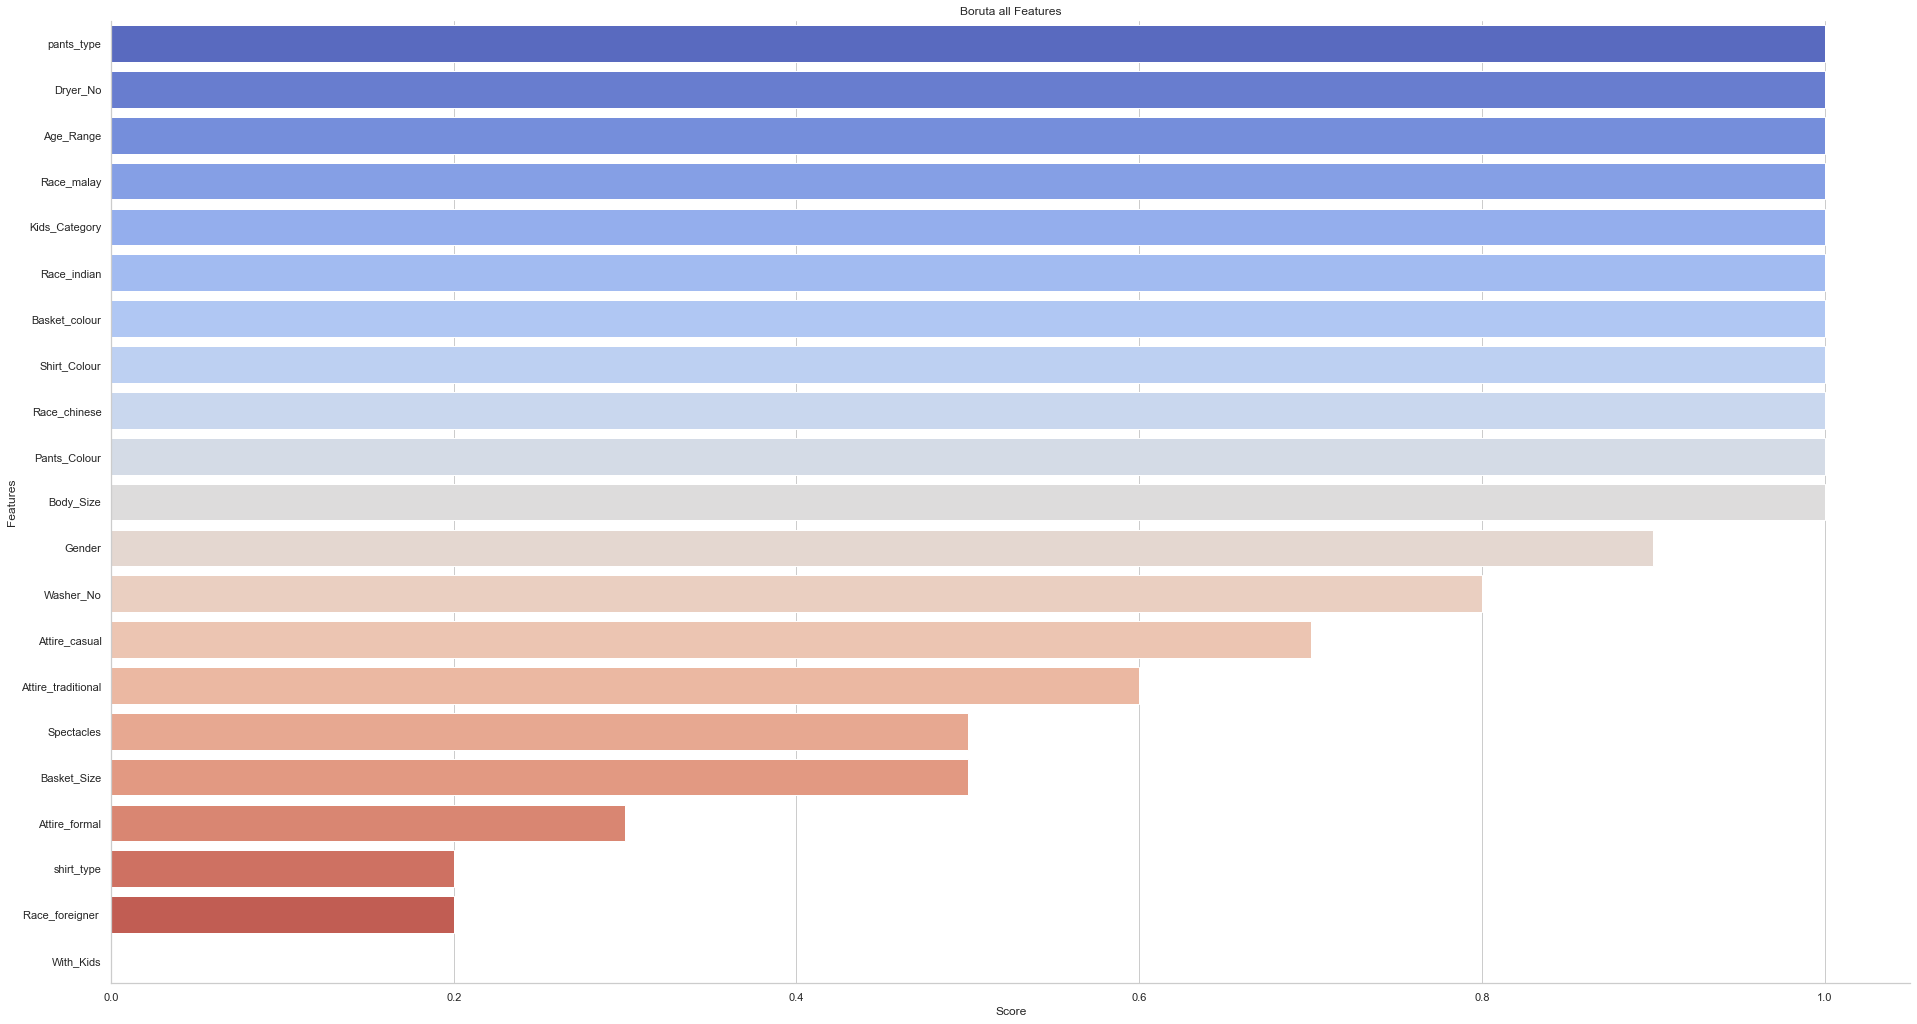

In [428]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta all Features")

In [429]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [430]:
cols = boruta_score[boruta_score['Score']>0]['Features'].ravel()

In [431]:
X=os_data_X[cols]
y=os_data_y.Wash_Item_clothes

In [432]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(maxiter=200)
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                          Results: Logit
Model:                Logit              Pseudo R-squared:  inf   
Dependent Variable:   Wash_Item_clothes  AIC:               inf   
Date:                 2021-11-01 09:32   BIC:               inf   
No. Observations:     724                Log-Likelihood:    -inf  
Df Model:             19                 LL-Null:           0.0000
Df Residuals:         704                LLR p-value:       1.0000
Converged:            1.0000             Scale:             1.0000
No. Iterations:       7.0000                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
pants_type          0.7353   0.2789  2.6368 0.0084  0.1887  1.2818
Dryer_No           -0.1184   0.0777 -1.5243 0.1274 -0.2707

C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\base\model.

In [433]:
dropcol = ['Dryer_No','Kids_Category','Basket_colour','Body_Size','Spectacles','shirt_type']
X1 = X.drop(dropcol,1)

In [434]:
logit_model=sm.Logit(y,X1)
result=logit_model.fit(maxiter=200)
print(result.summary2())

C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                          Results: Logit
Model:                Logit              Pseudo R-squared:  inf   
Dependent Variable:   Wash_Item_clothes  AIC:               inf   
Date:                 2021-11-01 09:32   BIC:               inf   
No. Observations:     724                Log-Likelihood:    -inf  
Df Model:             13                 LL-Null:           0.0000
Df Residuals:         710                LLR p-value:       1.0000
Converged:            1.0000             Scale:             1.0000
No. Iterations:       7.0000                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
pants_type          0.6603   0.2728  2.4201 0.0155  0.1255  1.1950
Age_Range          -0.0718   0.0103 -6.9771 0.0000 -0.0919

C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Syazwan\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


####logistic regression

With less features

In [435]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X1,y.values.ravel(),test_size=0.2,random_state=0)
logreg = LogisticRegression(solver='lbfgs',max_iter=200)
logreg.fit(X_train,y_train)

C:\Users\Syazwan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [436]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [437]:
import pickle
pickle_out = open('logreg.pkl','wb')
pickle.dump(logreg, pickle_out) 
pickle_out.close()

In [438]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[56 16]
 [ 6 67]]


In [439]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        72
           1       0.81      0.92      0.86        73

    accuracy                           0.85       145
   macro avg       0.86      0.85      0.85       145
weighted avg       0.85      0.85      0.85       145



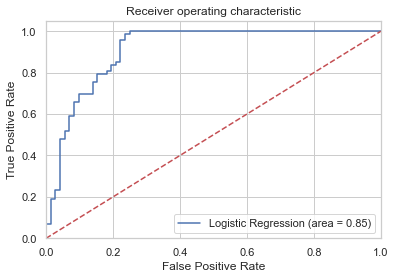

In [440]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right") 
plt.show()

with more features

In [441]:
X2 = X

In [442]:
X_train,X_test,y_train,y_test=train_test_split(X2,y.values.ravel(),test_size=0.2,random_state=0)
logreg = LogisticRegression(solver='lbfgs',max_iter=200)
logreg.fit(X_train,y_train)

C:\Users\Syazwan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [443]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [444]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[61 11]
 [ 5 68]]


In [445]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        72
           1       0.86      0.93      0.89        73

    accuracy                           0.89       145
   macro avg       0.89      0.89      0.89       145
weighted avg       0.89      0.89      0.89       145



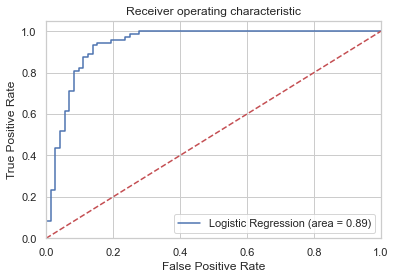

In [446]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right") 
plt.show()

## Using Assiociation Rule Mining to find what customers tend to use Washer No.4 and Dryer No.8

In [280]:
!pip install apyori
from apyori import apriori

In [281]:
df_arm = df.copy()

In [282]:
#drop the rows other than washer no 4 and dryer no 8
df_arm = df_arm[(df_arm['Washer_No'] == 4) | (df_arm['Dryer_No'] == 8)]

In [283]:
#remove numerical data
df_arm.drop(columns=['No', 'Date', 'Time', 'Age_Range'], axis = 1, inplace = True)
#one-hot encoding for the categorical data
one_hot = pd.get_dummies(data = df_arm, columns=['Race', 'Gender', 'Body_Size', 'With_Kids', 'Kids_Category', 'Basket_Size', 'Basket_colour', 'Attire', 'Shirt_Colour', 'shirt_type', 'Pants_Colour', 'pants_type', 'Wash_Item', 'Spectacles', 'Washer_No', 'Dryer_No'])
one_hot


,Race_chinese,Race_foreigner,Race_indian,Race_malay,Gender_female,Gender_male,Body_Size_fat,Body_Size_moderate,Body_Size_thin,With_Kids_no,...,Spectacles_no,Spectacles_yes,Washer_No_3,Washer_No_4,Washer_No_5,Washer_No_6,Dryer_No_7,Dryer_No_8,Dryer_No_9,Dryer_No_10
2,0,0,0,1,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
14,0,0,0,1,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
16,0,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
25,1,0,0,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0
32,0,1,0,0,0,1,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
778,0,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
779,0,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
788,1,0,0,0,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,0,0


In [284]:
colname = one_hot.columns
colname

Index(['Race_chinese', 'Race_foreigner ', 'Race_indian', 'Race_malay',
       'Gender_female', 'Gender_male', 'Body_Size_fat', 'Body_Size_moderate',
       'Body_Size_thin', 'With_Kids_no', 'With_Kids_yes', 'Kids_Category_baby',
       'Kids_Category_no_kids', 'Kids_Category_toddler',
       'Kids_Category_toddler ', 'Kids_Category_young', 'Basket_Size_big',
       'Basket_Size_small', 'Basket_colour_black', 'Basket_colour_blue',
       'Basket_colour_brown', 'Basket_colour_green', 'Basket_colour_grey',
       'Basket_colour_orange', 'Basket_colour_pink', 'Basket_colour_purple',
       'Basket_colour_red', 'Basket_colour_white', 'Basket_colour_yellow',
       'Attire_casual', 'Attire_formal', 'Attire_traditional',
       'Shirt_Colour_black', 'Shirt_Colour_blue', 'Shirt_Colour_brown',
       'Shirt_Colour_green', 'Shirt_Colour_grey', 'Shirt_Colour_orange',
       'Shirt_Colour_pink', 'Shirt_Colour_purple', 'Shirt_Colour_red',
       'Shirt_Colour_white', 'Shirt_Colour_yellow', 'shirt_t

In [285]:
## Replacing non-zero values with product names
def get_colname(x):
    for col in colname:
        if x[col] > 0:
            x[col] = col
    return x

one_hot = one_hot.apply(get_colname, axis=1)
one_hot.head()

,Race_chinese,Race_foreigner,Race_indian,Race_malay,Gender_female,Gender_male,Body_Size_fat,Body_Size_moderate,Body_Size_thin,With_Kids_no,...,Spectacles_no,Spectacles_yes,Washer_No_3,Washer_No_4,Washer_No_5,Washer_No_6,Dryer_No_7,Dryer_No_8,Dryer_No_9,Dryer_No_10
2,0,0,0,Race_malay,Gender_female,0,0,Body_Size_moderate,0,With_Kids_no,...,Spectacles_no,0,0,Washer_No_4,0,0,0,0,0,Dryer_No_10
14,0,0,0,Race_malay,Gender_female,0,0,Body_Size_moderate,0,0,...,0,Spectacles_yes,Washer_No_3,0,0,0,0,Dryer_No_8,0,0
16,0,0,0,Race_malay,Gender_female,0,0,0,Body_Size_thin,0,...,Spectacles_no,0,0,Washer_No_4,0,0,Dryer_No_7,0,0,0
25,Race_chinese,0,0,0,Gender_female,0,0,Body_Size_moderate,0,With_Kids_no,...,Spectacles_no,0,Washer_No_3,0,0,0,0,Dryer_No_8,0,0
32,0,Race_foreigner,0,0,0,Gender_male,0,Body_Size_moderate,0,With_Kids_no,...,Spectacles_no,0,Washer_No_3,0,0,0,0,Dryer_No_8,0,0


In [286]:
#remove all zeros
x = one_hot.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
arm_data = x
arm_data[:10]#first 10

[['Race_malay',
  'Gender_female',
  'Body_Size_moderate',
  'With_Kids_no',
  'Kids_Category_no_kids',
  'Basket_Size_big',
  'Basket_colour_blue',
  'Attire_casual',
  'Shirt_Colour_red',
  'shirt_type_short_sleeve',
  'Pants_Colour_black',
  'pants_type_long',
  'Wash_Item_clothes',
  'Spectacles_no',
  'Washer_No_4',
  'Dryer_No_10'],
 ['Race_malay',
  'Gender_female',
  'Body_Size_moderate',
  'With_Kids_yes',
  'Kids_Category_young',
  'Basket_Size_big',
  'Basket_colour_red',
  'Attire_casual',
  'Shirt_Colour_brown',
  'shirt_type_long sleeve',
  'Pants_Colour_grey',
  'pants_type_long',
  'Wash_Item_clothes',
  'Spectacles_yes',
  'Washer_No_3',
  'Dryer_No_8'],
 ['Race_malay',
  'Gender_female',
  'Body_Size_thin',
  'With_Kids_yes',
  'Kids_Category_toddler ',
  'Basket_Size_big',
  'Basket_colour_blue',
  'Attire_casual',
  'Shirt_Colour_brown',
  'shirt_type_long sleeve',
  'Pants_Colour_grey',
  'pants_type_long',
  'Wash_Item_clothes',
  'Spectacles_no',
  'Washer_No_4',

In [287]:
rules = apriori(arm_data, min_support=0.045, min_confidence=0.5, min_lift=3, min_length=3,target="rules")
association_results = list(rules)

KeyboardInterrupt: 

In [ ]:
association_results[:100]

In [ ]:
#putting results in organised Pandas DataFrame
def inspect(association_results):
    lhs         = [tuple(result[2][0][0])[0] for result in association_results]
    rhs         = [tuple(result[2][0][1])[0] for result in association_results]
    supports    = [result[1] for result in association_results]
    confidences = [result[2][0][2] for result in association_results]
    lifts       = [result[2][0][3] for result in association_results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(association_results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
#resultsinDataFrame.to_csv("arm_results.csv")

In [ ]:
for item in association_results:

    pair = item[0]
    num = len(item)
    items = [x for x in pair]
    if items[1] == 'Washer_No_4':
        print("Rule: " + items[0] + " -> " + items[1])

        print("Support: " + str(item[1]))

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [ ]:
for item in association_results[:200]:

    pair = item[0]
    num = len(item)
    items = [x for x in pair]
    if items[1] == 'Dryer_No_8':
        print("Rule: " + items[0] + " -> " + items[1])

        print("Support: " + str(item[1]))

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

#Clustering

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

In [ ]:
df_clus = df.copy()

In [ ]:
#get min
df_clus['Age_Range'].min()

In [ ]:
#get_max
df_clus['Age_Range'].max()

In [ ]:
#binning age
df_clus['Age_Bins'] = pd.cut(x=df_clus['Age_Range'], bins=[20, 29, 39, 49, 59])

In [ ]:
df_clus.drop(columns=['No', 'Date', 'Time', 'Age_Range'], inplace=True)

In [ ]:
all_features = df_clus.columns

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_clus)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 5 clusters
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_clus)
clusters

In [ ]:
#df_clus.drop('Cluster', axis=1, inplace=True)

In [ ]:
df_clus.insert(0, "Cluster", clusters, True)
df_clus.head(10)

In [ ]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = df_clus)
    plt.show()


# Classification

In [338]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [339]:

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
y_pred

nb.score(X_test, y_test)
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))



prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:,1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

confusion_majority=confusion_matrix(y_test, y_pred)


print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))



Accuracy on test set: 0.683
AUC: 0.92
Mjority classifier Confusion Matrix
 [[68  4]
 [42 31]]
**
Mjority TN=  68
Mjority FP= 4
Mjority FN=  42
Mjority TP=  31
**
Precision= 0.89
Recall= 0.42
F1= 0.57
Accuracy= 0.68


In [340]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
 
knn.fit(X_train, y_train)



print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

prob_KNN = nb.predict_proba(X_test)
prob_KNN = prob_KNN[:,1]

auc_KNN= roc_auc_score(y_test, prob_KNN)
print('AUC: %.2f' % auc_KNN)

confusion_majority=confusion_matrix(y_test, y_pred)


print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Accuracy on test set: 0.724
AUC: 0.92
Mjority classifier Confusion Matrix
 [[68  4]
 [42 31]]
**
Mjority TN=  68
Mjority FP= 4
Mjority FN=  42
Mjority TP=  31
**
Precision= 0.89
Recall= 0.42
F1= 0.57
Accuracy= 0.68
